In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.columns = [col.replace(' ','_') for col in data.columns]
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# main aim of the project is to predict the student maths exam score using input features

input_data = data.drop(columns=['math_score'])
target = data['math_score']


In [8]:
input_data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
input_data.dtypes

gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
reading_score                   int64
writing_score                   int64
dtype: object

In [12]:
input_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:
input_data[input_data.duplicated()]
#Not treating this as these are not duplicate records

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
445,female,group C,some high school,standard,completed,74,77
555,female,group C,some college,free/reduced,none,39,33
713,male,group D,master's degree,standard,none,81,84
957,female,group D,master's degree,standard,none,100,100


### univariant analysis

In [24]:
numerical_columns = input_data.select_dtypes(exclude='object').columns
categorical_columns = input_data.select_dtypes(include = 'object').columns

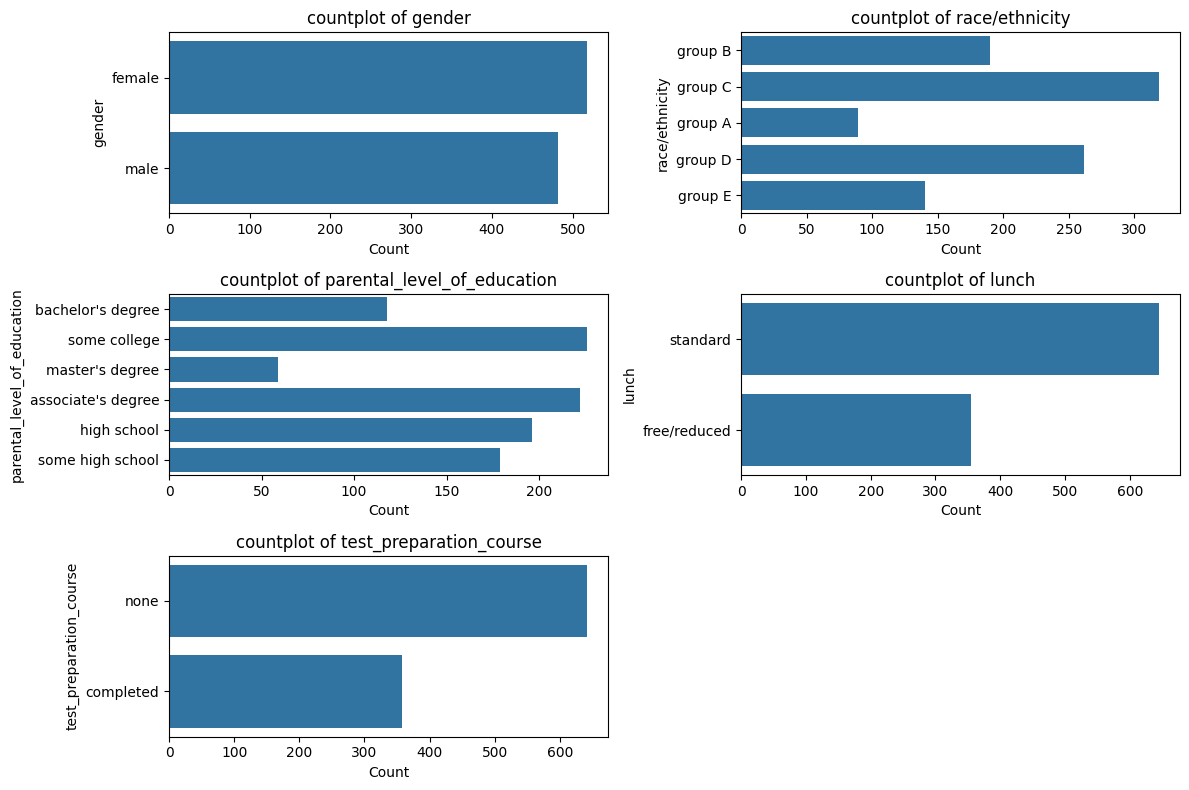

In [37]:
n = len(input_data[categorical_columns].columns)
cols = 2
rows = math.ceil(n/cols)

fig,axes = plt.subplots(rows,cols,figsize = (12,8))

axes = axes.flatten()

for i, col in enumerate(input_data[categorical_columns].columns):
    sns.countplot(input_data[col], ax=axes[i])
    axes[i].set_title(f'countplot of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()





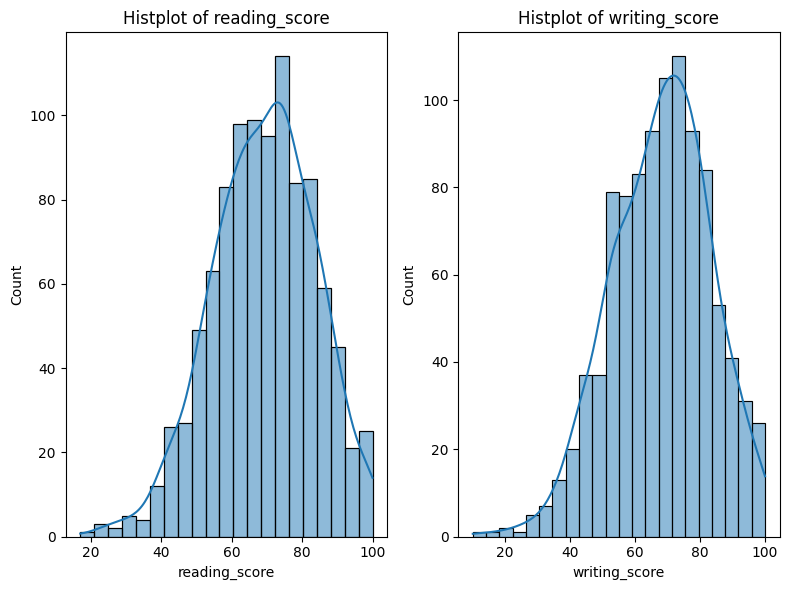

In [41]:
n = len(input_data[numerical_columns].columns)
cols = 2
rows = math.ceil(n/cols)

fig,axes = plt.subplots(rows,cols,figsize = (8,6))

axes = axes.flatten()

for i, col in enumerate(input_data[numerical_columns].columns):
    sns.histplot(input_data[col], ax=axes[i],kde=True)
    axes[i].set_title(f'Histplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()





## Bi-variant analysis

In [45]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


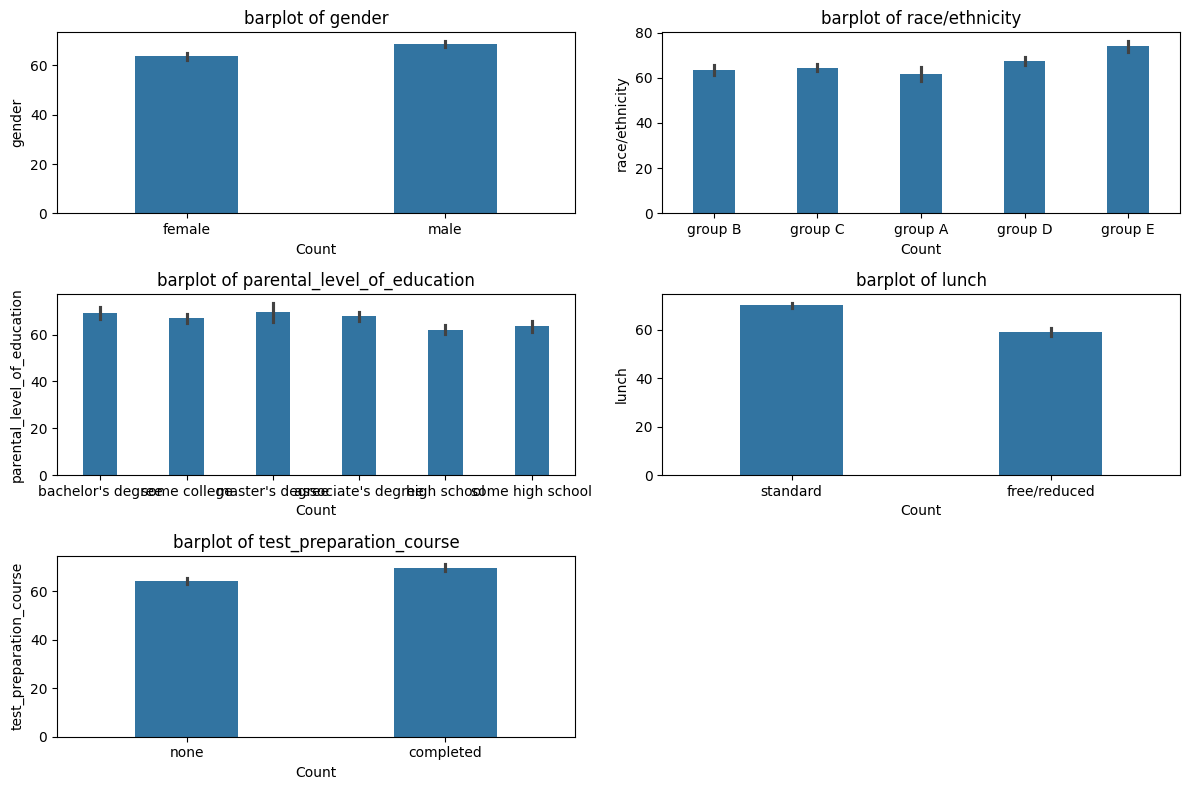

In [56]:
n = len(input_data[categorical_columns].columns)
cols = 2
rows = math.ceil(n/cols)

fig,axes = plt.subplots(rows,cols,figsize = (12,8))

axes = axes.flatten()

for i, col in enumerate(data.select_dtypes(include='object').columns):
    sns.barplot(data=data,x=data[col],y=data['math_score'],ax=axes[i],width=0.4,dodge='auto')
    axes[i].set_title(f'barplot of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()





In [ ]:
from sklearn.model_selection import trai_test_split